In [2]:
from google.colab import files
uploaded = files.upload()
#files.download( "data/dm.ckpt.meta" ) 

Saving human.jpg to human.jpg


## **TASK-1**

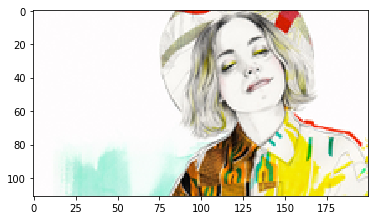

In [71]:
import PIL
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

# RESIZING
%matplotlib inline
im = Image.open('human.jpg')
size = 200, 200
im.thumbnail(size, Image.ANTIALIAS)
im.save('resized_image.jpg')
imshow(np.asarray(im))


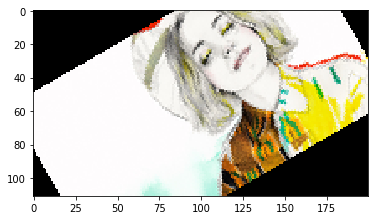

In [72]:
# ROTATE IMAGE
angle = 30
rotated_im = im.rotate(angle)
rotated_im.save('rotated_image.jpg')
imshow(np.asarray(rotated_im))

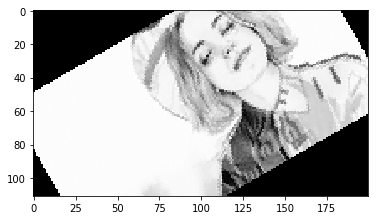

In [73]:
import matplotlib.pyplot as plt
# CONVERT TO GRAYSCALE
img_grayscale = rotated_im.convert('L')
img_grayscale.save('grayscale_image.jpg')
plt.imshow(img_grayscale, cmap=plt.get_cmap('gray'))
plt.show()

## **TASK-2**

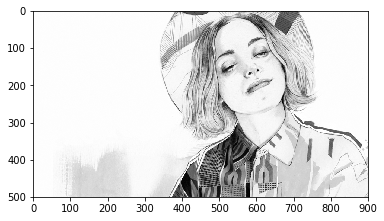

In [75]:
import numpy as np
import matplotlib.pyplot as plt

im = Image.open('human.jpg')
a = np.array(im) # this will convert the PIL.Image object to numpy array representation
a.shape # this will print out the shape of the array.
# Now convert this to gray scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray = rgb2gray(a)    
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

## TASK-3

### Image Histogram

An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image

(array([  8477.,  17763.,  23921.,  33113., 366726.]),
 array([  0.,  51., 102., 153., 204., 255.]),
 <a list of 5 Patch objects>)

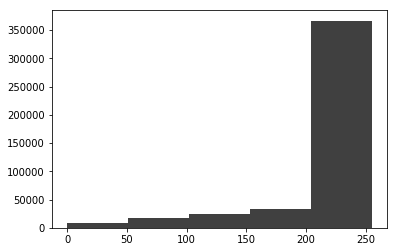

In [17]:
import matplotlib.pyplot as plt
import numpy as np

img = np.asarray(Image.open('human.jpg').convert('L'))
plt.hist(img.flatten(),bins=5, facecolor='black', alpha=0.75)

### Histogram Equalization

Histogram equalization is a technique for adjusting image intensities to enhance contrast.

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


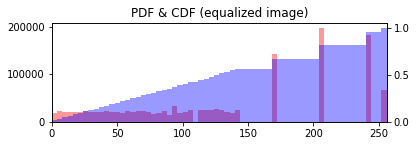

In [58]:
# Load the image into an array: image
image = plt.imread('human.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), density=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
#plt.subplot(2,1,1)
# plt.title('Equalized image')
# plt.axis('off')
# plt.imshow(new_image, cmap=plt.get_cmap('gray'))
# plt.show()

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)
plt.grid('false')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('false')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, density=True,
               color='blue', alpha=0.4)
plt.show()


## TASK-4

### Harris Detector

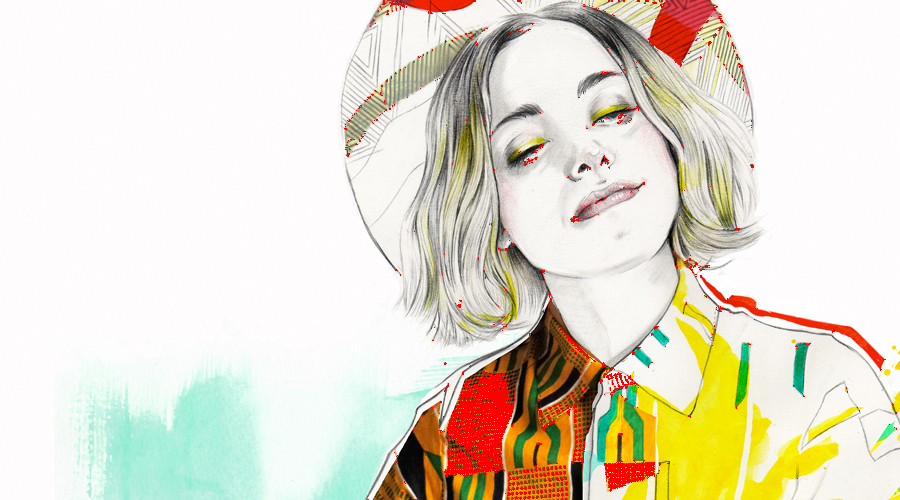

In [62]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('human.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

img[dst>0.01*dst.max()]=[0,0,255]

cv2_imshow(img)
cv2.imwrite('harris_detector.jpg',img)
if cv2.waitKey(0) & 0xff == 27:
  cv2.destroyAllWindows()


### Hessian Detector 

In [20]:
#!pip install opencv-python==3.4.2.16
#!pip install opencv-contrib-python==3.4.2.16


KeyboardInterrupt: ignored

In [0]:
import cv2 as cv
img = cv.imread('human.jpg',0)
surf = cv.xfeatures2d.SURF_create(400)
kp, des = surf.detectAndCompute(img,None)

In [22]:
len(kp)

1582

In [23]:
print( surf.getHessianThreshold())

400.0


In [0]:
surf.setHessianThreshold(500)

In [28]:
kp, des = surf.detectAndCompute(img,None)
print( len(kp))

1372


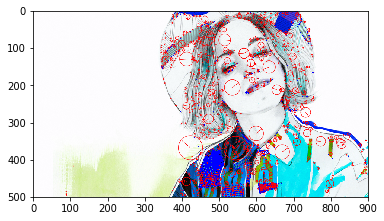

True

In [63]:
img2 = cv.drawKeypoints(img,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()
cv2.imwrite('hessian_detector.jpg',img2)

## TASK-6

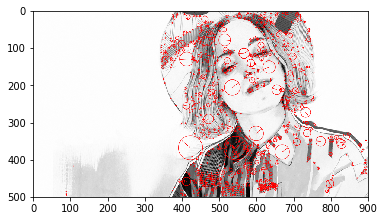

(<matplotlib.image.AxesImage at 0x7fbdaf032390>, None)

In [46]:
import cv2 as cv

import numpy as np

img = cv2.imread('human.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img=cv.drawKeypoints(gray,kp,None,(255,0,0),4)

#cv2.imwrite('sift_keypoints.jpg',img)

img=cv2.drawKeypoints(gray,kp,None,(255,0,0),4)
cv2.imwrite('sift_keypoints.jpg',img)
plt.imshow(img),plt.show()

In [0]:
from google.colab import files
illustration1 = files.upload()

from google.colab import files
illustration2 = files.upload()


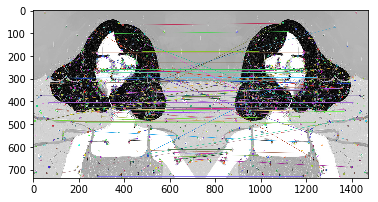

True

In [65]:

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('illustration.jpg',0)          # queryImage
img2 = cv.imread('illustrationFlipped.jpg',0) # trainImage
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2, good, 2)
plt.imshow(img3),plt.show()
cv2.imwrite('matching_keypoints.jpg',img3)